# Topic: Clustering on Fruit Consumption v.s. GDP per capita

In this homework, I am going to do the clustering analysis based on dataset [Fruit consumption vs. GDP per capita, 1990 to 2017](https://ourworldindata.org/grapher/fruit-consumption-vs-gdp-per-capita?time=earliest..latest) . By comparing the results from clustering, I am going to deliver insights and differences between different clustering methods in this homework.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import warnings
warnings.simplefilter("ignore")

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import MDS, TSNE

## a) Data inspection 

In [2]:
# load the dataset
df = pd.read_csv("/Users/bryton/Desktop/fruit-consumption-vs-gdp-per-capita.csv")
df

Entity Code  Year  \
0      Albania  ALB  1997   
1      Albania  ALB  1998   
2      Albania  ALB  1999   
3      Albania  ALB  2000   
4      Albania  ALB  2001   
...        ...  ...   ...   
3250  Zimbabwe  ZWE  2013   
3251  Zimbabwe  ZWE  2014   
3252  Zimbabwe  ZWE  2015   
3253  Zimbabwe  ZWE  2016   
3254  Zimbabwe  ZWE  2017   

      Fruits - Excluding Wine - Food supply quantity (kg/capita/yr) (FAO, 2020)  \
0                                                 41.31                           
1                                                 48.03                           
2                                                 57.64                           
3                                                 70.53                           
4                                                 83.58                           
...                                                 ...                           
3250                                              15.32                           
3251                                              15.41                           
3252                                              15.44                           
3253                                              12.80                           
3254                                              14.87                           

      GDP per capita, PPP (constant 2017 international $) Continent  
0                                           4400.577827      Europe  
1                                           4819.387534      Europe  
2                                           5475.169135      Europe  
3                                           5893.136233      Europe  
4                                           6441.853452      Europe  
...                                                 ...         ...  
3250                                        3176.829330      Africa  
3251                                        3195.767970      Africa  
3252                                        3198.982129      Africa  
3253                                        3173.610829      Africa  
3254                                        3274.611198      Africa  

[3255 rows x 6 columns]

Inspect dataframe shape

In [3]:
df.shape

(3255, 6)

In [4]:
df.Entity.describe()

count        3255
unique        155
top       Albania
freq           21
Name: Entity, dtype: object

In [5]:
df.Year.unique()

array([1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007,
       2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017])

In [6]:
df.Year.unique().shape

(21,)

## b) Data cleansing and transformation

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3255 entries, 0 to 3254
Data columns (total 6 columns):
 #   Column                                                                     Non-Null Count  Dtype  
---  ------                                                                     --------------  -----  
 0   Entity                                                                     3255 non-null   object 
 1   Code                                                                       3255 non-null   object 
 2   Year                                                                       3255 non-null   int64  
 3   Fruits - Excluding Wine - Food supply quantity (kg/capita/yr) (FAO, 2020)  3255 non-null   float64
 4   GDP per capita, PPP (constant 2017 international $)                        3255 non-null   float64
 5   Continent                                                                  3255 non-null   object 
dtypes: float64(2), int64(1), object(3)
memory usage: 152.7+ K

In [8]:
df.isnull().sum()

Entity                                                                       0
Code                                                                         0
Year                                                                         0
Fruits - Excluding Wine - Food supply quantity (kg/capita/yr) (FAO, 2020)    0
GDP per capita, PPP (constant 2017 international $)                          0
Continent                                                                    0
dtype: int64

In [9]:
# change the column names
df.rename(columns = {'Fruits - Excluding Wine - Food supply quantity (kg/capita/yr) (FAO, 2020)':'Fruit Supplement', 'GDP per capita, PPP (constant 2017 international $)':'GDP per capita'}, inplace = True)

In [10]:
df

Entity Code  Year  Fruit Supplement  GDP per capita Continent
0      Albania  ALB  1997             41.31     4400.577827    Europe
1      Albania  ALB  1998             48.03     4819.387534    Europe
2      Albania  ALB  1999             57.64     5475.169135    Europe
3      Albania  ALB  2000             70.53     5893.136233    Europe
4      Albania  ALB  2001             83.58     6441.853452    Europe
...        ...  ...   ...               ...             ...       ...
3250  Zimbabwe  ZWE  2013             15.32     3176.829330    Africa
3251  Zimbabwe  ZWE  2014             15.41     3195.767970    Africa
3252  Zimbabwe  ZWE  2015             15.44     3198.982129    Africa
3253  Zimbabwe  ZWE  2016             12.80     3173.610829    Africa
3254  Zimbabwe  ZWE  2017             14.87     3274.611198    Africa

[3255 rows x 6 columns]

## c) EDA - Investigate the distribution of the fruit consumption and GDP per capita

In [11]:
# investgate the distribution of the numerical variables
df.describe()

Year  Fruit Supplement  GDP per capita
count  3255.000000       3255.000000     3255.000000
mean   2007.000000         81.932912    17065.278947
std       6.056231         54.763734    17903.563312
min    1997.000000          3.750000      548.347795
25%    2002.000000         45.945000     4000.416911
50%    2007.000000         72.410000    10630.505140
75%    2012.000000        107.015000    24303.332805
max    2017.000000        418.720000   161971.034900

Note that we are visualizing the total distribution of 'Fruit Supplement' and 'GDP per capita' while we ignoring the difference between years.

[Text(0.5, 1.0, 'Fruit Supplement Distribution')]

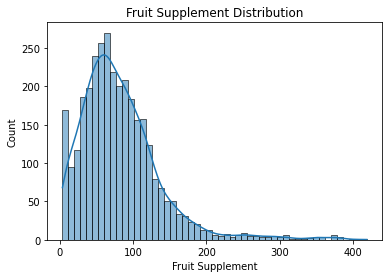

In [12]:
sns.histplot(data = df, x = 'Fruit Supplement', kde = True).set(title = 'Fruit Supplement Distribution')

From the distribution, we can see that the fruit supplement each year basically fall in the range of 50 - 100 kgs.

[Text(0.5, 1.0, 'GDP per capita Distribution')]

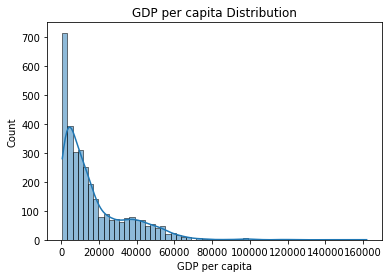

In [13]:
sns.histplot(data = df, x = 'GDP per capita', kde = True).set(title = 'GDP per capita Distribution')

From the distribution, we now know the GDP per capita each year across the world basically lay in the range of 4,000 - 20,000 dollars.

## d) Visualize the trend and trajectories through years

In [14]:
# Situation on 1997
fruit1997 = df[df['Year'] == 1997]

px.scatter(fruit1997, x = 'GDP per capita', y = 'Fruit Supplement', color = 'Continent', log_x = True,
          title = 'GDP per capita v.s. Fruit Supplement on 1997')

In [15]:
# Situation on 2007
fruit2007 = df[df['Year'] == 2007]

px.scatter(fruit2007, x = 'GDP per capita', y = 'Fruit Supplement', color = 'Continent', log_x = True,
          title = 'GDP per capita v.s. Fruit Supplement on 2007')

Note that GDP per capita is growing in a exponential way, so we had better to rescale the X axis - 'GDP per capita' into logorithm style, and the normal line chart might be too noisy for us to observe the most of the observations in a nutshell. 

In [16]:
# line chart with log x axis 
px.line(df, x = 'GDP per capita', y = 'Fruit Supplement', color = 'Entity', log_x = True,
       title = 'GDP per capita v.s. Fruit Supplement')

We can know from two plots above the major trend is comsumption of fruits goes up as the GDP per capita growing

But these plots are bad in identifying the groups very well because seaborn can not plot complex aggregate function. Another version made in tableau will be provided as comparison.

## e) Data manipulation for MDS and tSNE 

In [17]:
gdpPercap = df[['Entity','Year','GDP per capita']].set_index(['Entity','Year']).unstack()
gdpPercap

GDP per capita                                            \
Year                          1997          1998          1999          2000   
Entity                                                                         
Albania                4400.577827   4819.387534   5475.169135   5893.136233   
Algeria                8074.759681   8360.151446   8506.345679   8710.455149   
Angola                 4728.156924   4792.684163   4740.669236   4727.966314   
Antigua and Barbuda   16828.090940  17260.301570  17551.466770  18313.349710   
Argentina             19347.537040  19866.245050  18981.168380  18625.283550   
...                            ...           ...           ...           ...   
Uzbekistan             2569.310381   2637.004996   2720.908670   2786.430374   
Vanuatu                3017.052522   2999.906925   2955.689882   3068.095866   
Vietnam                2587.055215   2701.770508   2797.785536   2954.982905   
Zambia                 1994.849295   1933.003767   1968.215220   1990.858991   
Zimbabwe               3871.434059   3951.319481   3893.930562   3756.139483   

                                                                             \
Year                         2001          2002          2003          2004   
Entity                                                                        
Albania               6441.853452   6754.536003   7154.784825   7580.629091   
Algeria               8855.020186   9232.427523   9771.684856  10058.439020   
Angola                4766.836736   5240.839433   5218.207712   5593.243624   
Antigua and Barbuda  17207.651210  17143.326030  17952.779140  18743.286850   
Argentina            17610.755390  15523.038780  16714.670130  18032.611430   
...                           ...           ...           ...           ...   
Uzbekistan            2865.940295   2943.572386   3032.666318   3221.189333   
Vanuatu               2897.359191   2679.920368   2724.144437   2761.115983   
Vietnam               3105.643482   3269.875375   3462.880228   3689.732511   
Zambia                2042.537498   2080.195690   2168.333196   2261.766733   
Zimbabwe              3796.657107   3450.189031   2857.152336   2682.783000   

                                                 ...                \
Year                         2005          2006  ...          2008   
Entity                                           ...                 
Albania               8040.878717   8569.191113  ...   9912.577242   
Algeria              10504.858470  10527.422080  ...  10796.902560   
Angola                6210.222188   6681.101028  ...   7864.374579   
Antigua and Barbuda  19683.541080  21848.888130  ...  23131.577650   
Argentina            19426.440140  20777.652710  ...  23103.456520   
...                           ...           ...  ...           ...   
Uzbekistan            3405.216308   3614.577371  ...   4185.557525   
Vanuatu               2835.927046   3002.859077  ...   3112.333217   
Vietnam               3931.765368   4167.107648  ...   4628.029653   
Zambia                2362.902226   2483.207962  ...   2747.438504   
Zimbabwe              2517.672707   2414.767519  ...   1880.803583   

                                                                             \
Year                         2009          2010          2011          2012   
Entity                                                                        
Albania              10313.926440  10749.487450  11052.790460  11227.994490   
Algeria              10782.361090  10970.706370  11078.242330  11233.531320   
Angola                7643.495786   7692.434286   7675.446085   8036.692402   
Antigua and Barbuda  20047.716010  18205.738530  17605.170140  17966.064360   
Argentina            21519.893620  23521.270180  24647.629270  24118.867520   
...                           ...           ...           ...           ...   
Uzbekistan            4446.863606   4651.522962   4880.862629   5164.274222   
Vanuatu              

In [18]:
gdpPercap.info()

<class 'pandas.core.frame.DataFrame'>
Index: 155 entries, Albania to Zimbabwe
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   (GDP per capita, 1997)  155 non-null    float64
 1   (GDP per capita, 1998)  155 non-null    float64
 2   (GDP per capita, 1999)  155 non-null    float64
 3   (GDP per capita, 2000)  155 non-null    float64
 4   (GDP per capita, 2001)  155 non-null    float64
 5   (GDP per capita, 2002)  155 non-null    float64
 6   (GDP per capita, 2003)  155 non-null    float64
 7   (GDP per capita, 2004)  155 non-null    float64
 8   (GDP per capita, 2005)  155 non-null    float64
 9   (GDP per capita, 2006)  155 non-null    float64
 10  (GDP per capita, 2007)  155 non-null    float64
 11  (GDP per capita, 2008)  155 non-null    float64
 12  (GDP per capita, 2009)  155 non-null    float64
 13  (GDP per capita, 2010)  155 non-null    float64
 14  (GDP per capita, 2011)  155 non-null

In [19]:
fruit = df[['Entity','Year','Fruit Supplement']].set_index(['Entity','Year']).unstack()
fruit

Fruit Supplement                                          \
Year                            1997    1998    1999    2000    2001    2002   
Entity                                                                         
Albania                        41.31   48.03   57.64   70.53   83.58   87.34   
Algeria                        35.15   38.41   43.63   40.93   47.27   57.07   
Angola                         31.20   31.28   27.66   28.24   30.62   37.34   
Antigua and Barbuda           140.05  123.22  156.62  164.91  154.31  148.15   
Argentina                     105.62  100.19   97.62  109.50  116.70   85.38   
...                              ...     ...     ...     ...     ...     ...   
Uzbekistan                     30.44   27.97   26.36   38.21   39.07   40.58   
Vanuatu                        90.61  100.41   96.52   95.56   92.06   91.98   
Vietnam                        47.88   48.32   47.02   51.65   49.65   53.42   
Zambia                         10.71   10.06   11.07   10.26   11.25   10.95   
Zimbabwe                       11.06    9.86   10.03   10.66   12.15   12.87   

                                                     ...                  \
Year                   2003    2004    2005    2006  ...    2008    2009   
Entity                                               ...                   
Albania               92.01   94.35  102.89  110.82  ...  118.96  125.57   
Algeria               61.78   62.07   68.74   75.20  ...   76.22   87.56   
Angola                44.75   49.13   55.81   58.84  ...   64.73   79.90   
Antigua and Barbuda  151.75  156.29  190.83  187.57  ...  192.95  194.27   
Argentina             84.14   84.67   77.06   77.86  ...   75.34   75.12   
...                     ...     ...     ...     ...  ...     ...     ...   
Uzbekistan            32.55   38.53   41.42   54.97  ...   62.66   68.46   
Vanuatu               94.10   94.25   91.13   91.37  ...   96.35   91.24   
Vietnam               57.58   61.48   63.52   62.42  ...   65.86   67.35   
Zambia                10.23   10.11   10.23   11.35  ...   10.44   10.26   
Zimbabwe              14.33   15.07   10.54   13.13  ...   14.48   14.26   

                                                                             \
Year                   2010    2011    2012    2013    2014    2015    2016   
Entity                                                                        
Albania              132.31  133.59  139.75  142.00  162.18  169.10  176.27   
Algeria               90.31  102.33  105.83  114.19  109.01  112.63  104.11   
Angola                81.58   78.86   78.51   90.34   74.63   68.96   66.99   
Antigua and Barbuda  182.86  173.78  150.90  157.78  126.15  129.78  129.83   
Argentina             74.65   91.34   80.48   76.42   86.10   90.78   89.63   
...                     ...     ...     ...     ...     ...     ...     ...   
Uzbekistan            75.92   76.68   84.85   91.17  100.12  104.22   97.75   
Vanuatu               92.74   84.39   80.38   80.18   80.35   78.44   76.59   
Vietnam               68.05   68.15   68.36   68.06   75.72   72.84   75.04   
Zambia                 9.66    9.51   10.47   10.23    9.93    8.62    8.64   
Zimbabwe              16.12   17.19   17.90   15.32   15.41   15.44   12.80   

                             
Year                   2017  
Entity                       
Albania              171.08  
Algeria              101.92  
Angola                68.52  
Antigua and Barbuda  136.07  
Argentina             93.87  
...                     ...  
Uzbekistan            96.37  
Vanuatu               76.22  
Vietnam               84.23  
Zambia                 7.25  
Zimbabwe              14.87  

[155 rows x 21 columns]

In [20]:
fruit.info()

<class 'pandas.core.frame.DataFrame'>
Index: 155 entries, Albania to Zimbabwe
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   (Fruit Supplement, 1997)  155 non-null    float64
 1   (Fruit Supplement, 1998)  155 non-null    float64
 2   (Fruit Supplement, 1999)  155 non-null    float64
 3   (Fruit Supplement, 2000)  155 non-null    float64
 4   (Fruit Supplement, 2001)  155 non-null    float64
 5   (Fruit Supplement, 2002)  155 non-null    float64
 6   (Fruit Supplement, 2003)  155 non-null    float64
 7   (Fruit Supplement, 2004)  155 non-null    float64
 8   (Fruit Supplement, 2005)  155 non-null    float64
 9   (Fruit Supplement, 2006)  155 non-null    float64
 10  (Fruit Supplement, 2007)  155 non-null    float64
 11  (Fruit Supplement, 2008)  155 non-null    float64
 12  (Fruit Supplement, 2009)  155 non-null    float64
 13  (Fruit Supplement, 2010)  155 non-null    float64
 14  (Fru

In [21]:
# concat the 'Fruit Supplement' and 'gdpPercap'
df2 = pd.concat([fruit,gdpPercap], axis =1)
df2

Fruit Supplement                                          \
Year                            1997    1998    1999    2000    2001    2002   
Entity                                                                         
Albania                        41.31   48.03   57.64   70.53   83.58   87.34   
Algeria                        35.15   38.41   43.63   40.93   47.27   57.07   
Angola                         31.20   31.28   27.66   28.24   30.62   37.34   
Antigua and Barbuda           140.05  123.22  156.62  164.91  154.31  148.15   
Argentina                     105.62  100.19   97.62  109.50  116.70   85.38   
...                              ...     ...     ...     ...     ...     ...   
Uzbekistan                     30.44   27.97   26.36   38.21   39.07   40.58   
Vanuatu                        90.61  100.41   96.52   95.56   92.06   91.98   
Vietnam                        47.88   48.32   47.02   51.65   49.65   53.42   
Zambia                         10.71   10.06   11.07   10.26   11.25   10.95   
Zimbabwe                       11.06    9.86   10.03   10.66   12.15   12.87   

                                                     ... GDP per capita  \
Year                   2003    2004    2005    2006  ...           2008   
Entity                                               ...                  
Albania               92.01   94.35  102.89  110.82  ...    9912.577242   
Algeria               61.78   62.07   68.74   75.20  ...   10796.902560   
Angola                44.75   49.13   55.81   58.84  ...    7864.374579   
Antigua and Barbuda  151.75  156.29  190.83  187.57  ...   23131.577650   
Argentina             84.14   84.67   77.06   77.86  ...   23103.456520   
...                     ...     ...     ...     ...  ...            ...   
Uzbekistan            32.55   38.53   41.42   54.97  ...    4185.557525   
Vanuatu               94.10   94.25   91.13   91.37  ...    3112.333217   
Vietnam               57.58   61.48   63.52   62.42  ...    4628.029653   
Zambia                10.23   10.11   10.23   11.35  ...    2747.438504   
Zimbabwe              14.33   15.07   10.54   13.13  ...    1880.803583   

                                                                             \
Year                         2009          2010          2011          2012   
Entity                                                                        
Albania              10313.926440  10749.487450  11052.790460  11227.994490   
Algeria              10782.361090  10970.706370  11078.242330  11233.531320   
Angola                7643.495786   7692.434286   7675.446085   8036.692402   
Antigua and Barbuda  20047.716010  18205.738530  17605.170140  17966.064360   
Argentina            21519.893620  23521.270180  24647.629270  24118.867520   
...                           ...           ...           ...           ...   
Uzbekistan            4446.863606   4651.522962   4880.862629   5164.274222   
Vanuatu               3129.645024   3088.978879   3101.328794   3046.685823   
Vietnam               4830.305069   5089.411016   5352.022081   5574.493705   
Zambia                2917.515557   3125.528849   3201.288029   3339.269902   
Zimbabwe              2082.075337   2458.220626   2764.338916   3170.726522   

                                                                             \
Year                         2013          2014          2015          2016   
Entity                                                                        
Albania              11361.293680  11586.863770  11878.488090  12291.873380   
Algeria              11319.097060  11512.705110  11696.965230  11826.166420   
Angola                8140.525973   8239.830672   8036.410898   7568.998168   
Antigua and Barbuda  17642.860870  18104.407340  18594.261620  19419.580800   
Argentina            24424.136450  23550.099060  23933.886610  23189.527450   
...                           ...           ...           ...           ...   
Uzbekistan            5469.855

In [22]:
# Standardlization
SS = StandardScaler()

# Transform and store the result in the DataFrame
df_scaled = SS.fit(df2).transform(df2)
df_scaled = pd.DataFrame(df_scaled, columns = df2.columns, index = df2.index)

df_scaled

Fruit Supplement                                          \
Year                            1997      1998      1999      2000      2001   
Entity                                                                         
Albania                    -0.615692 -0.487289 -0.351244 -0.163286  0.087320   
Algeria                    -0.718205 -0.650734 -0.579734 -0.680897 -0.581638   
Angola                     -0.783940 -0.771873 -0.840191 -0.902806 -0.888390   
Antigua and Barbuda         1.027514  0.790199  1.263033  1.487126  1.390417   
Argentina                   0.454539  0.398916  0.300795  0.518178  0.697508   
...                              ...       ...       ...       ...       ...   
Uzbekistan                 -0.796588 -0.828111 -0.861393 -0.728462 -0.732711   
Vanuatu                     0.204746  0.402654  0.282855  0.274411  0.243552   
Vietnam                    -0.506356 -0.482362 -0.524446 -0.493438 -0.537790   
Zambia                     -1.124929 -1.132404 -1.110759 -1.217220 -1.245254   
Zimbabwe                   -1.119105 -1.135802 -1.127721 -1.210225 -1.228673   

                                                                       ...  \
Year                     2002      2003      2004      2005      2006  ...   
Entity                                                                 ...   
Albania              0.114816  0.208290  0.219101  0.340796  0.479393  ...   
Algeria             -0.437420 -0.349640 -0.358721 -0.277092 -0.182189  ...   
Angola              -0.797368 -0.663948 -0.590352 -0.511040 -0.486048  ...   
Antigua and Barbuda  1.224215  1.310862  1.327847  1.931927  1.904894  ...   
Argentina            0.079059  0.063040  0.045826 -0.126556 -0.132784  ...   
...                       ...       ...       ...       ...       ...  ...   
Uzbekistan          -0.738258 -0.889114 -0.780095 -0.771403 -0.557927  ...   
Vanuatu              0.199467  0.246864  0.217311  0.128018  0.118142  ...   
Vietnam             -0.504009 -0.427156 -0.369283 -0.371540 -0.419555  ...   
Zambia              -1.278819 -1.301056 -1.288822 -1.335735 -1.368094  ...   
Zimbabwe            -1.243791 -1.225385 -1.200037 -1.330126 -1.335034  ...   

                    GDP per capita                                          \
Year                          2008      2009      2010      2011      2012   
Entity                                                                       
Albania                  -0.454546 -0.415776 -0.399107 -0.387936 -0.382868   
Algeria                  -0.405994 -0.388518 -0.386764 -0.386594 -0.382582   
Angola                   -0.566998 -0.571168 -0.569681 -0.566026 -0.547689   
Antigua and Barbuda       0.271214  0.150632  0.016927 -0.042424 -0.034867   
Argentina                 0.269670  0.236298  0.313516  0.328931  0.282907   
...                            ...       ...       ...       ...       ...   
Uzbekistan               -0.768976 -0.757180 -0.739354 -0.713387 -0.696041   
Vanuatu                  -0.827899 -0.833829 -0.826539 -0.807223 -0.805408   
Vietnam                  -0.744683 -0.734867 -0.714921 -0.688543 -0.674854   
Zambia                   -0.847932 -0.846172 -0.824499 -0.801953 -0.790297   
Zimbabwe                 -0.895513 -0.894787 -0.861733 -0.824993 -0.799001   

                                                                       
Year                     2013      2014      2015      2016      2017  
Entity                                                                 
Albania             -0.380385 -0.385396 -0.397797 -0.388734 -0.375123  
Algeria             -0.382502 -0.389145 -0.407464 -0.413412 -0.428094  
Angola              -0.541955 -0.554593 -0.602407 -0.638997 -0.654957  
Antigua and Barbuda -0.065269 -0.055927 -0.040148 -0.011041 -0.012814  
Argentina            0.274914  0.219359  0.244213  0.188727  0.179727  
...                       ...       ...       ...       ...       ...  
Uzbekistan          -0.675929 -0.679724 -0.706238 -0.703785 -0.69

In [23]:
# PCA
pca = PCA(n_components = 2).fit(df_scaled)
pca.explained_variance_ratio_.sum()

0.9274551188756641

We can see that our first two principal components explain the majority of the variance in this dataset (92.74%), which is good enough to avoid overfitting in the clustering process. This is an indication of the total information represented compared to the original data.

## MDS Approach

In [24]:
# employed MDS methods
mds = MDS(n_components = 2, random_state = 0)
MDS = mds.fit_transform(df_scaled)

projections = pd.DataFrame(index = df_scaled.index)
projections['MDS_x'] = MDS[:,0]
projections['MDS_y'] = MDS[:,1]

In [25]:
projections

MDS_x     MDS_y
Entity                                 
Albania              3.607528 -3.270890
Algeria              2.037363  0.225562
Angola               2.771368  2.131354
Antigua and Barbuda -0.541193 -6.916705
Argentina           -1.092017 -0.512439
...                       ...       ...
Uzbekistan           4.088900  1.613996
Vanuatu              3.774038 -0.436694
Vietnam              3.303310  1.749988
Zambia               3.380564  6.355688
Zimbabwe             3.306837  6.031881

[155 rows x 2 columns]

In [26]:
country = df.drop(df.iloc[:, 1:5], axis =1)
entity = country.drop_duplicates()
entity

Entity      Continent
0                 Albania         Europe
21                Algeria         Africa
42                 Angola         Africa
63    Antigua and Barbuda  North America
84              Argentina  South America
...                   ...            ...
3150           Uzbekistan           Asia
3171              Vanuatu        Oceania
3192              Vietnam           Asia
3213               Zambia         Africa
3234             Zimbabwe         Africa

[155 rows x 2 columns]

In [27]:
projections = projections.merge(entity, left_index=True, right_on='Entity')

In [28]:
projections

MDS_x     MDS_y               Entity      Continent
0     3.607528 -3.270890              Albania         Europe
21    2.037363  0.225562              Algeria         Africa
42    2.771368  2.131354               Angola         Africa
63   -0.541193 -6.916705  Antigua and Barbuda  North America
84   -1.092017 -0.512439            Argentina  South America
...        ...       ...                  ...            ...
3150  4.088900  1.613996           Uzbekistan           Asia
3171  3.774038 -0.436694              Vanuatu        Oceania
3192  3.303310  1.749988              Vietnam           Asia
3213  3.380564  6.355688               Zambia         Africa
3234  3.306837  6.031881             Zimbabwe         Africa

[155 rows x 4 columns]

In [29]:
# the good fit of MDS
mds.stress_

2520.307295353273

In [30]:
# plot the MDS results
px.scatter(projections, x="MDS_x", y="MDS_y", hover_name="Entity", color="Continent",width=800, height=800, 
           title="MDS projection")

## tSNE Approach

In [31]:
tsne = TSNE(n_components = 2, random_state = 0)

tsne_coords = tsne.fit_transform(df_scaled)

projections['tSNE_x'] = tsne_coords[:,0]
projections['tSNE_y'] = tsne_coords[:,1]


In [32]:
projections

MDS_x     MDS_y               Entity      Continent    tSNE_x  \
0     3.607528 -3.270890              Albania         Europe  6.641146   
21    2.037363  0.225562              Algeria         Africa  3.337852   
42    2.771368  2.131354               Angola         Africa  0.512932   
63   -0.541193 -6.916705  Antigua and Barbuda  North America  8.005424   
84   -1.092017 -0.512439            Argentina  South America  3.284927   
...        ...       ...                  ...            ...       ...   
3150  4.088900  1.613996           Uzbekistan           Asia  1.726526   
3171  3.774038 -0.436694              Vanuatu        Oceania  3.114355   
3192  3.303310  1.749988              Vietnam           Asia  0.828909   
3213  3.380564  6.355688               Zambia         Africa -7.856229   
3234  3.306837  6.031881             Zimbabwe         Africa -7.416264   

        tSNE_y  
0     2.731660  
21    6.268291  
42    6.270116  
63   -0.747796  
84   -0.806663  
...        ...  
3150  6.719596  
3171  3.822758  
3192  5.527392  
3213  5.928771  
3234  5.802191  

[155 rows x 6 columns]

In [33]:
# plot the tSNE results
px.scatter(projections, x="tSNE_x", y="tSNE_y", hover_name="Entity", color="Continent",width=800, height=800, 
           title="tSNE projection")

Note that the MDS and tSNE are both used as high dimension reduction methods to help visualization, the projection results could not be treated as the real clustering results and could not be interprate into real insights 

## f) Clustering

In this sector, I will try out several clustering methods on the dataset also try to tune the clustering to get a better result.

In [34]:
from sklearn.cluster import KMeans, SpectralClustering
from sklearn import metrics

### KMeans 

The clustering results with different K

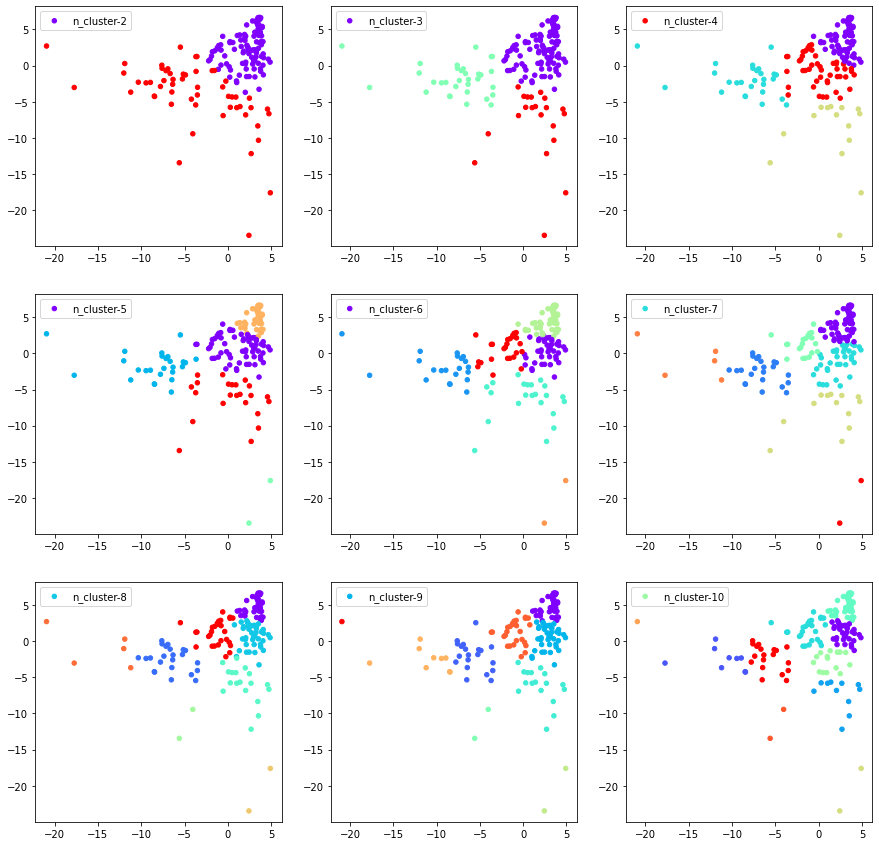

In [35]:
f = plt.figure()
f.set_size_inches(15, 15)

for i in range(2, 11):
    km = KMeans(n_clusters = i , init='k-means++', random_state = 0).fit(df_scaled)
    f.add_subplot(3, 3, i-1)
    plt.scatter(projections["MDS_x"], projections["MDS_y"], s=20, c = km.labels_, cmap ="rainbow" ,
                label="n_cluster-" + str(i))
    plt.legend()

plt.show()

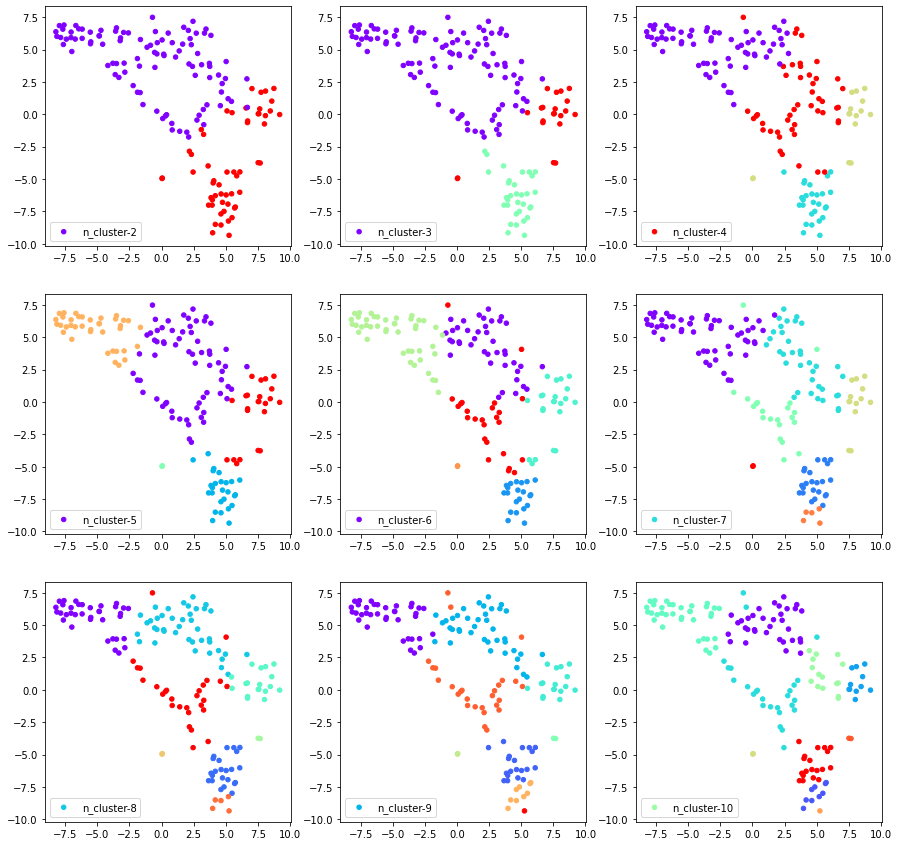

In [36]:
f = plt.figure()
f.set_size_inches(15, 15)

for i in range(2, 11):
    km = KMeans(n_clusters = i , init='k-means++', random_state = 0).fit(df_scaled)
    f.add_subplot(3, 3, i-1)
    plt.scatter(projections["tSNE_x"], projections["tSNE_y"], s=20, c = km.labels_, cmap ="rainbow" ,
                label="n_cluster-" + str(i))
    plt.legend()

plt.show()

Our aim is to choose clusters which provide small instracluster distance and large intercluster distance. Thus, I choose "K-Means++" initialization, which initializes centroids to be (generally) distant from each other, leading to probably better results than random initialization.

### Hyperparameter Optimization: Elbow method 

In [37]:
# finding the best number for the cluster
n_inertia=[] 
for i in range(2,11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state = 0)
    kmeans.fit(df_scaled)
    # inertia is calculaing min intracluster distance
    n_inertia.append(kmeans.inertia_)

n_inertia

[3833.246437494687,
 2475.9576499232135,
 1994.7733288897825,
 1661.7377928236497,
 1428.3814260110134,
 1222.8998190708537,
 1060.322767590384,
 941.3994110055214,
 834.7255347387236]

Elbow methods is a naïve method to choose the best k. Its idea is to calculate the inertia(a.k.a Within-Cluster-Sum of Squared Errors (WSS)) for different values of k, and choose the k for which inertia becomes first starts to diminish. In the plot of inertia v.s. k, this is visible as an elbow.

Text(0, 0.5, 'Inertia')

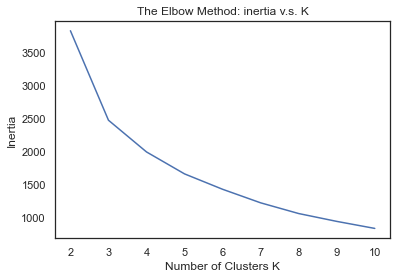

In [38]:
sns.set(rc={'figure.figsize':(6,4)})
sns.set_style("white")
sns.lineplot(range(2,11), n_inertia)
plt.title("The Elbow Method: inertia v.s. K")
plt.xlabel("Number of Clusters K")
plt.ylabel("Inertia")

We can 'guess' that the best number of cluster k under elbow method is 3 by eyeballing.

### Hyperparameter Optimization: Silhouette Method

The idea of the Silhuoette method is: [The silhouette value measures how similar a point is to its own cluster (cohesion) compared to other clusters (separation).](https://en.wikipedia.org/wiki/Silhouette_(clustering)#:~:text=The%20silhouette%20value%20is%20a,poorly%20matched%20to%20neighboring%20clusters.)

In [39]:
from sklearn.metrics import silhouette_score

sil = []

# dissimilarity would not be defined for a single cluster, thus, minimum number of clusters should be 2
for k in range(2, 11):
    # set random state equals 10 to reproducibility
    kmeans = KMeans(n_clusters = k, random_state = 0)
    kmeans.fit(df_scaled)
    labels = kmeans.fit_predict(df_scaled)
    sil.append(silhouette_score(df_scaled, labels, metric = 'euclidean'))
    
sil

[0.4480584173299648,
 0.5064609604268953,
 0.34722261838036955,
 0.3319438337954032,
 0.3259085915031846,
 0.34665175968031464,
 0.35574968544507546,
 0.34188617669651766,
 0.32461100534944304]

Text(0, 0.5, 'Silhouette score')

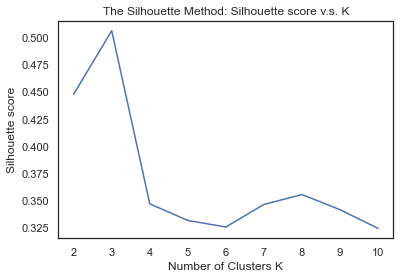

In [40]:
sns.set(rc={'figure.figsize':(6,4)})
sns.set_style("white")
sns.lineplot(range(2,11), sil)
plt.title("The Silhouette Method: Silhouette score v.s. K")
plt.xlabel("Number of Clusters K")
plt.ylabel("Silhouette score")

From the plot we can tell the K = 3 is the best, which is the same to the elbow method.

### Building KMeans Clustering model with K =3 

In [41]:
kmeans3 = KMeans(n_clusters = 3, random_state = 0)
km = kmeans3.fit(df_scaled)
km.labels_

array([0, 0, 0, 2, 0, 0, 1, 1, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 1, 1, 1, 2, 2, 2, 0, 0, 0, 0,
       0, 0, 1, 1, 2, 0, 0, 1, 2, 1, 2, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       2, 0, 1, 1, 1, 2, 1, 0, 0, 0, 0, 1, 0, 0, 0, 2, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 2, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 2, 0, 2, 2, 2, 1, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0], dtype=int32)

In [42]:
# export the labels to the projections
projections['KMeans3'] = km.labels_

In [43]:
projections['KMeans3'] = projections['KMeans3'].astype('str')
projections['KMeans3']

0       0
21      0
42      0
63      2
84      0
       ..
3150    0
3171    0
3192    0
3213    0
3234    0
Name: KMeans3, Length: 155, dtype: object

### Show centroids on the clustering map

Calculate the clustering centroids

In [44]:
# MDS centroids
km3_mdscentroids = projections[['Entity', 'KMeans3', 
                             'MDS_x', 'MDS_y']].groupby(['KMeans3']).mean().reset_index()
km3_mdscentroids

KMeans3     MDS_x     MDS_y
0       0  2.094767  2.223295
1       1 -7.587713 -1.825992
2       2  1.387644 -8.016396

In [45]:
# tSNE centroids
km3_tsnecentroids = projections[['Entity', 'KMeans3', 
                             'tSNE_x', 'tSNE_y']].groupby(['KMeans3']).mean().reset_index()
km3_tsnecentroids

KMeans3    tSNE_x    tSNE_y
0       0 -0.760262  3.951653
1       1  4.563657 -6.298754
2       2  6.859238 -0.432638

#### Plot the KMeans clustering results on MDS 

In [46]:
fig = px.scatter(projections, x="MDS_x", y="MDS_y",hover_name="Entity", color="KMeans3", width=800, height=800)
fig.show()

Text(0, 0.5, 'MDS_y')

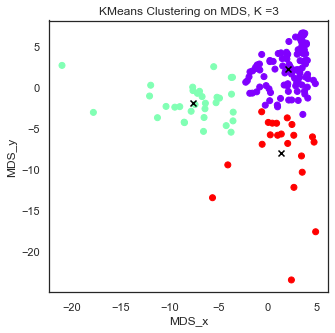

In [47]:
plt.scatter(projections['MDS_x'], projections['MDS_y'], c= km.labels_, cmap='rainbow')
plt.scatter(km3_mdscentroids['MDS_x'] ,km3_mdscentroids['MDS_y'], color='black', marker = "x")
plt.gcf().set_size_inches(5,5)
plt.title("KMeans Clustering on MDS, K =3")
plt.xlabel("MDS_x")
plt.ylabel("MDS_y")

In [48]:
# plot the trajectories of the entities near the cluster centroid
tmp = df.query("Entity in ['Uruguay', 'Ecuador', 'Sweden']")

fig = px.line(tmp, x="GDP per capita", y="Fruit Supplement", color="Entity",log_x = True, width=800, height=400)

fig.update_traces(textposition="bottom right")

fig.show()

#### Plot the KMeans clustering results on tSNE

In [49]:
fig = px.scatter(projections, x="tSNE_x", y="tSNE_y",hover_name="Entity", color="KMeans3", width=800, height=800)
fig.show()

Text(0, 0.5, 'tSNE_y')

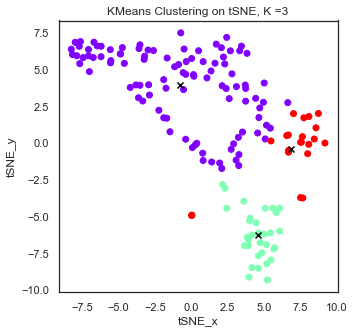

In [50]:
plt.scatter(projections['tSNE_x'], projections['tSNE_y'], c= km.labels_, cmap='rainbow')
plt.scatter(km3_tsnecentroids['tSNE_x'] ,km3_tsnecentroids['tSNE_y'], color='black', marker = "x")
plt.gcf().set_size_inches(5,5)
plt.title("KMeans Clustering on tSNE, K =3")
plt.xlabel("tSNE_x")
plt.ylabel("tSNE_y")

In [51]:
# plot the trajectories of the entities near the cluster centroid
tmp = df.query("Entity in ['Guyana', 'Lebanon', 'Spain']")

fig = px.line(tmp, x="GDP per capita", y="Fruit Supplement", color="Entity",  log_x = True, width=800, height=400)

fig.update_traces(textposition="bottom right")

fig.show()

We can see that KMeans with K = 3 cluster the countries as three types: 
    1. Fruit supplement decrease as the GDP percapita growing            - Ecuador / Lebanon
    2. Fruit supplement increase as the GDP percapita growing            - Uruguay / Guyana
    3. countries with GDP percapita                                      - Sweden  / Spain

### Spectral Clustering

Spectral Clustering performs a low-dimension embedding of the affinity matrix between samples. We usually use Calinski-Harabasz score to represent the [Variance Ratio Criterion](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.SpectralClustering.html#sklearn.cluster.SpectralClustering) of the clustering model.

The general way to [assign labels](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.SpectralClustering.html#sklearn.cluster.SpectralClustering) in SpectralClustering is 'KMeans', to show a difference with the KMeans methods, we try 'discretize' method below.

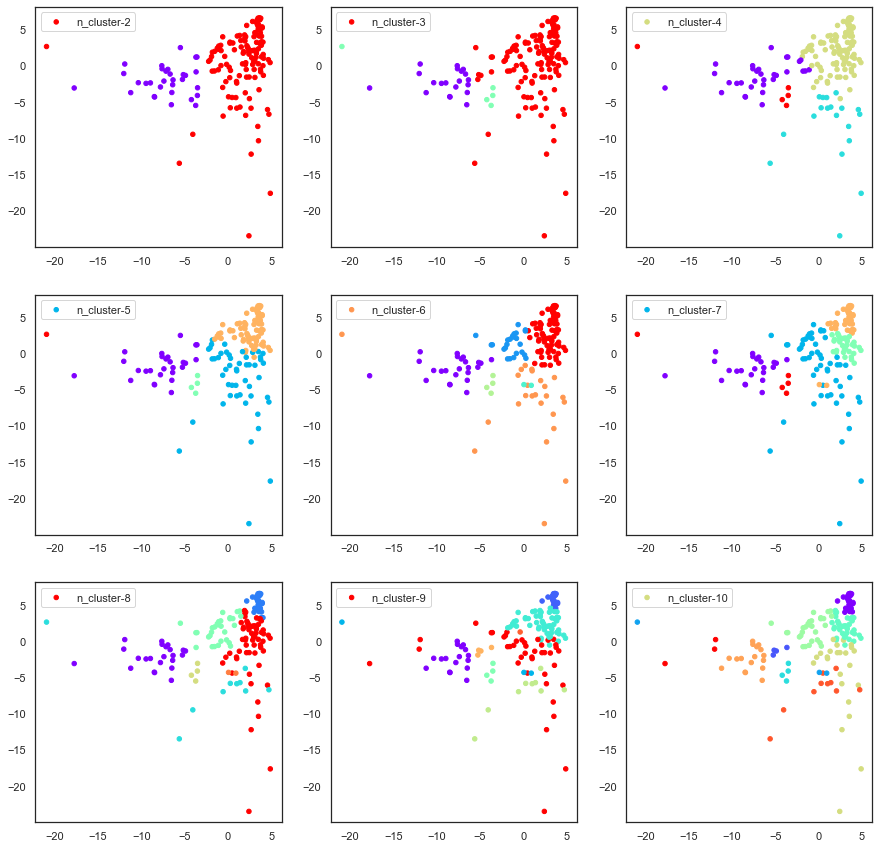

In [52]:
f = plt.figure()
f.set_size_inches(15, 15)

for k in range(2, 11):
    sc = SpectralClustering(n_clusters=k,assign_labels='discretize', random_state = 0).fit(df_scaled)
    f.add_subplot(3, 3, k-1)
    plt.scatter(projections["MDS_x"], projections["MDS_y"], s=20, c = sc.labels_, cmap ="rainbow" ,
                label="n_cluster-" + str(k))
    plt.legend()

plt.show()

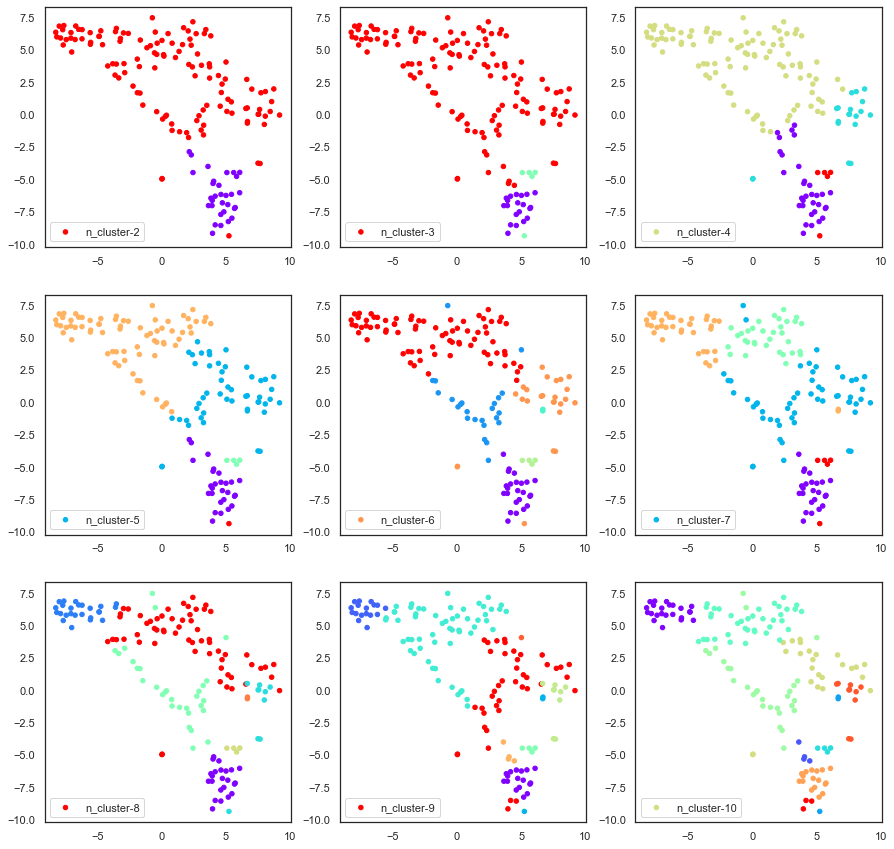

In [53]:
f = plt.figure()
f.set_size_inches(15, 15)

for k in range(2, 11):
    sc = SpectralClustering(n_clusters=k, assign_labels='discretize', random_state = 0).fit(df_scaled)
    f.add_subplot(3, 3, k-1)
    plt.scatter(projections["tSNE_x"], projections["tSNE_y"], s=20, c = sc.labels_, cmap ="rainbow" ,
                label="n_cluster-" + str(k))
    plt.legend()

plt.show()

### Finding the best K 

In [54]:
ch = []

for k in range(2,11):
    sc = SpectralClustering(n_clusters = k, assign_labels='discretize',random_state = 0)
    pred = sc.fit_predict(df_scaled)
    ch_score = metrics.calinski_harabasz_score(df_scaled, pred)
    s_score = silhouette_score(df_scaled, labels, metric = 'euclidean')
    print("Calinski-Harabasz score for k = ", k, " is ", ch_score)
    ch.append(ch_score)

Calinski-Harabasz score for k =  2  is  71.45628493338158
Calinski-Harabasz score for k =  3  is  39.65531186462359
Calinski-Harabasz score for k =  4  is  78.3564709679045
Calinski-Harabasz score for k =  5  is  62.71964624746411
Calinski-Harabasz score for k =  6  is  52.19669570007353
Calinski-Harabasz score for k =  7  is  46.59932785431795
Calinski-Harabasz score for k =  8  is  33.22635659354413
Calinski-Harabasz score for k =  9  is  22.882099488754125
Calinski-Harabasz score for k =  10  is  39.363280955540965


Text(0, 0.5, 'Calinski-Harabasz score')

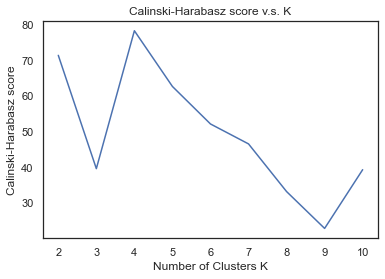

In [55]:
sns.set(rc={'figure.figsize':(6,4)})
sns.set_style("white")
sns.lineplot(range(2,11), ch)
plt.title("Calinski-Harabasz score v.s. K")
plt.xlabel("Number of Clusters K")
plt.ylabel("Calinski-Harabasz score")

The best value for parameter k is 4

### Build the SpectralClustering model for the best K = 4

In [56]:
sc4 = SpectralClustering(n_clusters = 4, assign_labels='discretize', random_state =0)
pred = sc4.fit_predict(df_scaled)
sc4.labels_

array([2, 2, 2, 1, 0, 2, 0, 0, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 2, 2, 2, 1, 2, 0, 0, 0, 0, 1, 1, 1, 2, 2, 0, 2,
       2, 2, 0, 0, 1, 2, 2, 0, 1, 3, 1, 2, 2, 2, 2, 2, 2, 0, 2, 0, 2, 2,
       1, 2, 0, 3, 0, 1, 0, 2, 2, 2, 2, 0, 2, 2, 2, 1, 2, 2, 3, 2, 2, 2,
       2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 1, 2,
       2, 2, 2, 2, 2, 3, 2, 2, 1, 0, 1, 1, 1, 0, 2, 2, 2, 3, 2, 2, 0, 0,
       2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 2, 2, 1, 2, 0, 0, 0, 2, 2, 2, 2, 2,
       2])

In [57]:
# append the projection labels to the projections DataFrame
projections['SpectralClustering4'] = sc4.labels_
projections

MDS_x     MDS_y               Entity      Continent    tSNE_x  \
0     3.607528 -3.270890              Albania         Europe  6.641146   
21    2.037363  0.225562              Algeria         Africa  3.337852   
42    2.771368  2.131354               Angola         Africa  0.512932   
63   -0.541193 -6.916705  Antigua and Barbuda  North America  8.005424   
84   -1.092017 -0.512439            Argentina  South America  3.284927   
...        ...       ...                  ...            ...       ...   
3150  4.088900  1.613996           Uzbekistan           Asia  1.726526   
3171  3.774038 -0.436694              Vanuatu        Oceania  3.114355   
3192  3.303310  1.749988              Vietnam           Asia  0.828909   
3213  3.380564  6.355688               Zambia         Africa -7.856229   
3234  3.306837  6.031881             Zimbabwe         Africa -7.416264   

        tSNE_y KMeans3  SpectralClustering4  
0     2.731660       0                    2  
21    6.268291       0                    2  
42    6.270116       0                    2  
63   -0.747796       2                    1  
84   -0.806663       0                    0  
...        ...     ...                  ...  
3150  6.719596       0                    2  
3171  3.822758       0                    2  
3192  5.527392       0                    2  
3213  5.928771       0                    2  
3234  5.802191       0                    2  

[155 rows x 8 columns]

#### Calculate the centroids for the clustering results 

Note that SpectralClustering does not have the attribute that return us an array contains centroids of each cluster, we need to calculate the cluster centroid using the definition here.

In [58]:
sc4_mdscentroids = projections[['Entity', 'SpectralClustering4', 
                             'MDS_x', 'MDS_y']].groupby(['SpectralClustering4']).mean().reset_index()
sc4_mdscentroids

SpectralClustering4     MDS_x     MDS_y
0                    0 -6.739016 -1.387192
1                    1  1.433270 -8.467974
2                    2  2.265391  2.219326
3                    3 -7.171454 -2.886327

Text(0, 0.5, 'MDS_y')

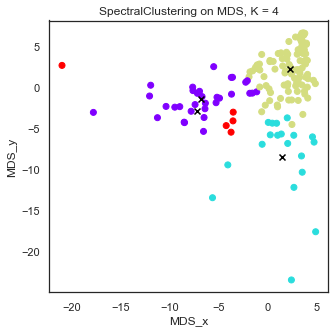

In [59]:
plt.scatter(projections['MDS_x'], projections['MDS_y'], c = sc4.labels_, cmap = 'rainbow')
plt.scatter(sc4_mdscentroids['MDS_x'] ,sc4_mdscentroids['MDS_y'], color='black', marker = "x")
plt.gcf().set_size_inches(5,5)
plt.title("SpectralClustering on MDS, K = 4")
plt.xlabel("MDS_x")
plt.ylabel("MDS_y")

The red point - 'Macau' at the upper left in the plot is a outlier, and the centroid of the red cluster is in a group of purple point.

In [60]:
# plot the trajectories of the entities near the cluster centroid
tmp = df.query("Entity in ['India', 'Ecuador', 'Sweden', 'Australia']")

fig = px.line(tmp, x="GDP per capita", y="Fruit Supplement", color="Entity",  log_x = True, width=800, height=400)

fig.update_traces(textposition="bottom right")

fig.show()

In [61]:
sc4_tsnecentroids = projections[['Entity', 'SpectralClustering4', 
                             'tSNE_x', 'tSNE_y']].groupby(['SpectralClustering4']).mean().reset_index()
sc4_tsnecentroids

SpectralClustering4    tSNE_x    tSNE_y
0                    0  4.120131 -5.648640
1                    1  6.922459 -0.588872
2                    2 -0.795395  4.160223
3                    3  5.581489 -5.498788

Text(0, 0.5, 'tSNE_y')

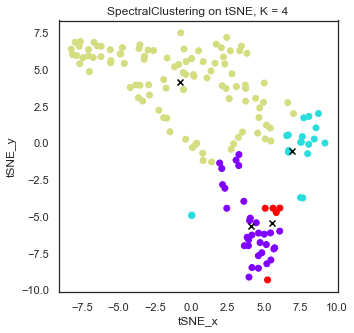

In [62]:
plt.scatter(projections['tSNE_x'], projections['tSNE_y'], c = sc4.labels_, cmap = 'rainbow')
plt.scatter(sc4_tsnecentroids['tSNE_x'] ,sc4_tsnecentroids['tSNE_y'], color='black', marker = "x")
plt.gcf().set_size_inches(5,5)
plt.title("SpectralClustering on tSNE, K = 4")
plt.xlabel("tSNE_x")
plt.ylabel("tSNE_y")

In [63]:
# plot the trajectories of the entities near the cluster centroid
tmp = df.query("Entity in ['Guyana', 'Lebanon', 'Spain', 'Israel']")

fig = px.line(tmp, x="GDP per capita", y="Fruit Supplement", color="Entity",  log_x = True, width=800, height=400)

fig.update_traces(textposition="bottom right")

fig.show()

From the picture we can see SpectralClustering with K = 4 further devide the high GDP per capita into different sub groups. For the other clusters, the character of the cluster still the same as the KMeans, where K =3

### Agglomerative Clustering

[Agglomerative Clustering](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html#sklearn.cluster.AgglomerativeClustering) is a hierarchical clsutering algorithm that build nested clusters by bottom up merging or splitting them successively. The idea is each observation starts in its own cluster, and clusters are successively merged together.

As we all want to minimize the difference within clusters, we will try the 'Ward' linkage method - a variance-minimizing approach minimizes the sum of squared differences within all clusters.

In [64]:
from sklearn.cluster import AgglomerativeClustering

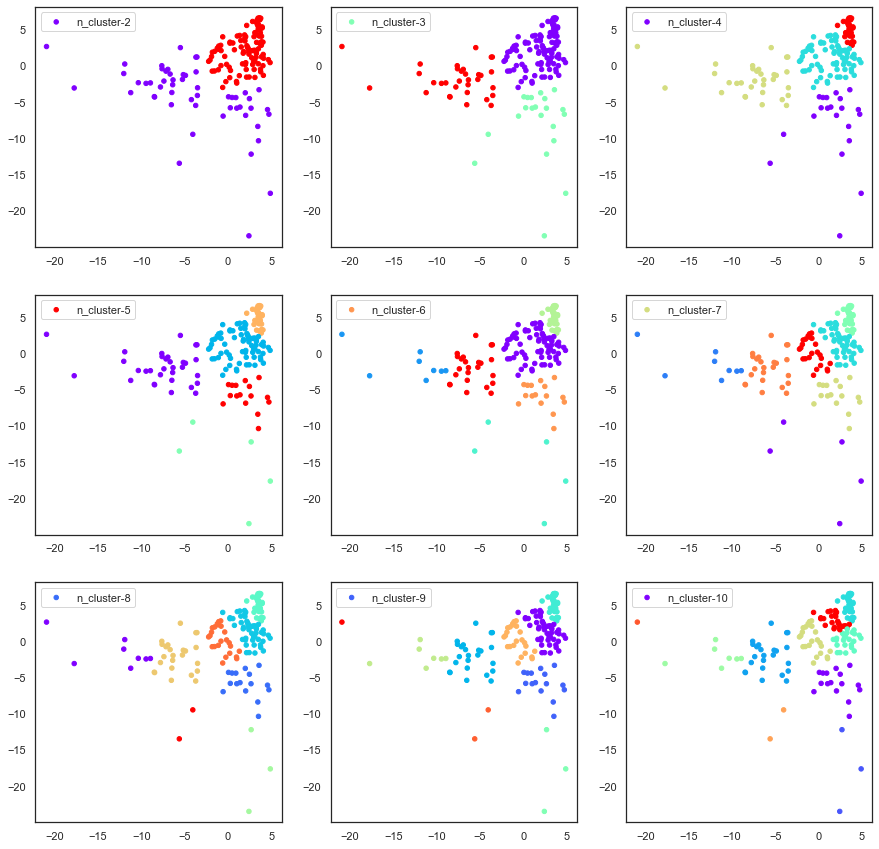

In [65]:
f = plt.figure()
f.set_size_inches(15, 15)

for k in range(2, 11):
    ac = AgglomerativeClustering(n_clusters = k, linkage = 'ward').fit(df_scaled)
    f.add_subplot(3, 3, k-1)
    plt.scatter(projections["MDS_x"], projections["MDS_y"], s=20, c = ac.labels_, cmap ="rainbow" ,
                label="n_cluster-" + str(k))
    plt.legend()

plt.show()

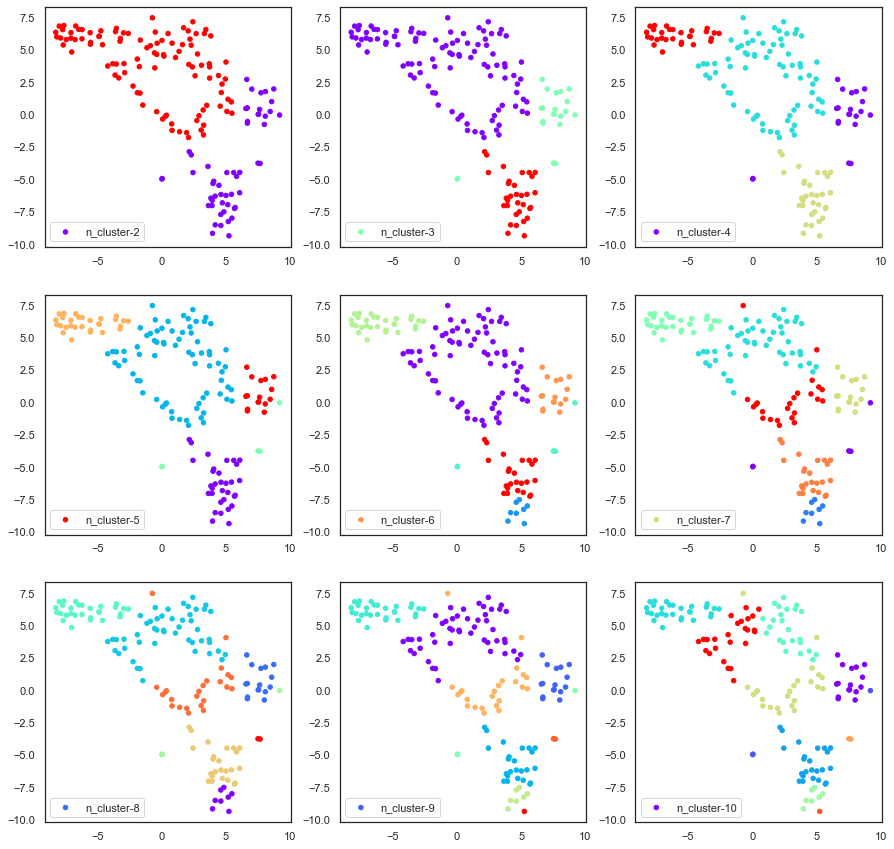

In [66]:
f = plt.figure()
f.set_size_inches(15, 15)

for k in range(2, 11):
    ac = AgglomerativeClustering(n_clusters = k, linkage = 'ward').fit(df_scaled)
    f.add_subplot(3, 3, k-1)
    plt.scatter(projections["tSNE_x"], projections["tSNE_y"], s=20, c = ac.labels_, cmap ="rainbow" ,
                label="n_cluster-" + str(k))
    plt.legend()

plt.show()

#### Finding the best K 

In [67]:
ch2 = []

for k in range(2,11):
    ac = AgglomerativeClustering(n_clusters = k, linkage = 'ward')
    pred = ac.fit_predict(df_scaled)
    ch_score2 = metrics.calinski_harabasz_score(df_scaled, pred)
    print("Calinski-Harabasz score for k = ", k, " is ", ch_score2)
    ch2.append(ch_score2)

Calinski-Harabasz score for k =  2  is  103.06237941165041
Calinski-Harabasz score for k =  3  is  122.86209275770999
Calinski-Harabasz score for k =  4  is  106.00062616846263
Calinski-Harabasz score for k =  5  is  102.91619864701211
Calinski-Harabasz score for k =  6  is  101.52200213255874
Calinski-Harabasz score for k =  7  is  99.3056764107197
Calinski-Harabasz score for k =  8  is  97.6012879410581
Calinski-Harabasz score for k =  9  is  99.1119736280935
Calinski-Harabasz score for k =  10  is  98.41601313275366


Text(0, 0.5, 'Calinski-Harabasz score')

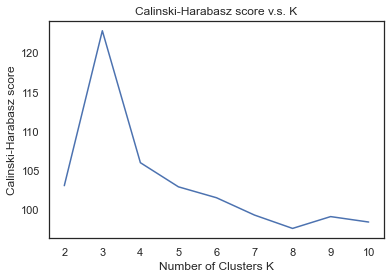

In [68]:
sns.set(rc={'figure.figsize':(6,4)})
sns.set_style("white")
sns.lineplot(range(2,11), ch2)
plt.title("Calinski-Harabasz score v.s. K")
plt.xlabel("Number of Clusters K")
plt.ylabel("Calinski-Harabasz score")

#### Building model with best K = 3 

In [69]:
ac3 = AgglomerativeClustering(n_clusters = 3, linkage = 'ward')
ac3.fit(df_scaled)
ac3.labels_

array([1, 0, 0, 1, 0, 0, 2, 2, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 2, 2, 2, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 2, 2, 1, 0, 0, 2, 1, 2, 1, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0,
       1, 0, 2, 2, 2, 1, 2, 0, 0, 0, 0, 2, 0, 0, 0, 1, 0, 0, 2, 0, 0, 0,
       0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 1, 0,
       0, 0, 0, 0, 0, 2, 0, 0, 1, 0, 1, 1, 1, 2, 0, 0, 0, 2, 0, 0, 2, 2,
       0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 2, 2, 2, 0, 0, 0, 0, 0,
       0])

In [70]:
# append the projection labels to the projections DataFrame
projections['AgglomerativeClustering3'] = ac3.labels_
projections

MDS_x     MDS_y               Entity      Continent    tSNE_x  \
0     3.607528 -3.270890              Albania         Europe  6.641146   
21    2.037363  0.225562              Algeria         Africa  3.337852   
42    2.771368  2.131354               Angola         Africa  0.512932   
63   -0.541193 -6.916705  Antigua and Barbuda  North America  8.005424   
84   -1.092017 -0.512439            Argentina  South America  3.284927   
...        ...       ...                  ...            ...       ...   
3150  4.088900  1.613996           Uzbekistan           Asia  1.726526   
3171  3.774038 -0.436694              Vanuatu        Oceania  3.114355   
3192  3.303310  1.749988              Vietnam           Asia  0.828909   
3213  3.380564  6.355688               Zambia         Africa -7.856229   
3234  3.306837  6.031881             Zimbabwe         Africa -7.416264   

        tSNE_y KMeans3  SpectralClustering4  AgglomerativeClustering3  
0     2.731660       0                    2                         1  
21    6.268291       0                    2                         0  
42    6.270116       0                    2                         0  
63   -0.747796       2                    1                         1  
84   -0.806663       0                    0                         0  
...        ...     ...                  ...                       ...  
3150  6.719596       0                    2                         0  
3171  3.822758       0                    2                         0  
3192  5.527392       0                    2                         0  
3213  5.928771       0                    2                         0  
3234  5.802191       0                    2                         0  

[155 rows x 9 columns]

Calculate the cluster centroids

In [71]:
# MDS centroids
ac3_mdscentroids = projections[['Entity', 'AgglomerativeClustering3', 
                             'MDS_x', 'MDS_y']].groupby(['AgglomerativeClustering3']).mean().reset_index()
ac3_mdscentroids

AgglomerativeClustering3     MDS_x     MDS_y
0                         0  2.053630  2.226425
1                         1  1.587454 -8.031602
2                         2 -7.587713 -1.825992

In [72]:
# tSNE centroids
ac3_tsnecentroids = projections[['Entity', 'AgglomerativeClustering3', 
                             'tSNE_x', 'tSNE_y']].groupby(['AgglomerativeClustering3']).mean().reset_index()
ac3_tsnecentroids

AgglomerativeClustering3    tSNE_x    tSNE_y
0                         0 -0.771600  3.926063
1                         1  6.914307 -0.308342
2                         2  4.563657 -6.298754

Text(0, 0.5, 'MDS_y')

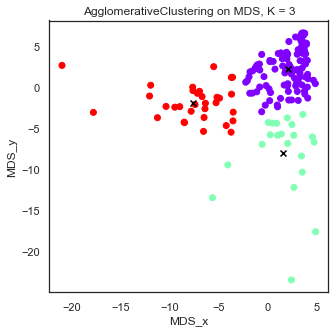

In [73]:
plt.scatter(projections['MDS_x'], projections['MDS_y'], c = ac3.labels_, cmap = 'rainbow')
plt.scatter(ac3_mdscentroids['MDS_x'] ,ac3_mdscentroids['MDS_y'], color='black', marker = "x")
plt.gcf().set_size_inches(5,5)
plt.title("AgglomerativeClustering on MDS, K = 3")
plt.xlabel("MDS_x")
plt.ylabel("MDS_y")

In [74]:
# plot the trajectories of the entities near the cluster centroid
tmp = df.query("Entity in ['Ecuador', 'Sweden', 'Guyana']")

fig = px.line(tmp, x="GDP per capita", y="Fruit Supplement", color="Entity",  log_x = True, width=800, height=400)

fig.update_traces(textposition="bottom right")

fig.show()

Text(0, 0.5, 'tSNE_y')

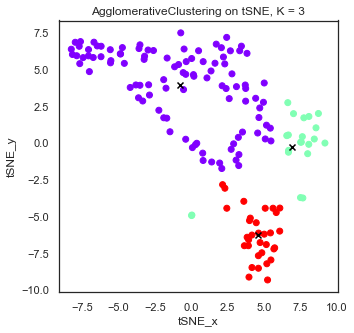

In [75]:
plt.scatter(projections['tSNE_x'], projections['tSNE_y'], c = ac3.labels_, cmap = 'rainbow')
plt.scatter(ac3_tsnecentroids['tSNE_x'] ,ac3_tsnecentroids['tSNE_y'], color='black', marker = "x")
plt.gcf().set_size_inches(5,5)
plt.title("AgglomerativeClustering on tSNE, K = 3")
plt.xlabel("tSNE_x")
plt.ylabel("tSNE_y")

In [76]:
# plot the trajectories of the entities near the cluster centroid
tmp = df.query("Entity in ['Lebanon', 'Spain', 'Guyana']")

fig = px.line(tmp, x="GDP per capita", y="Fruit Supplement", color="Entity",  log_x = True, width=800, height=400)

fig.update_traces(textposition="bottom right")

fig.show()

The Agglomerative Clustering results looks very similar to the KMeans result, which cluster centroids are close.

## Output the result of clustering

In [77]:
projections.to_csv('/Users/bryton/Desktop/fruit-consumption-vs-gdp-per-capita_projections.csv')